# Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Reading Dataset

In [25]:
data=pd.read_excel("F://SEM 7//SET-1//DATA//Adidas US Sales Datasets.xlsx")

In [26]:
data = data.drop('Unnamed: 0',axis=1)
data = data.drop(labels=[0,1,2], axis=0)
data.columns = data.iloc[0]
data = data.drop(labels=3, axis=0)
data = data.reset_index(drop=True)
data

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [28]:
data.isnull().sum()

3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [29]:
data.describe()

C:\Users\shruti\AppData\Local\Temp\ipykernel_19620\3175101911.py:1: FutureWarning:

The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`



3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648.00,9648
unique,6,4,724,5,50,52,6,146,361,3512,6510,127.00,3
top,Foot Locker,1185732,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50,225,100000,21000,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557,207,52,34,1229.00,4889


In [30]:
data.duplicated().sum()

0

## Market Share of Retailers

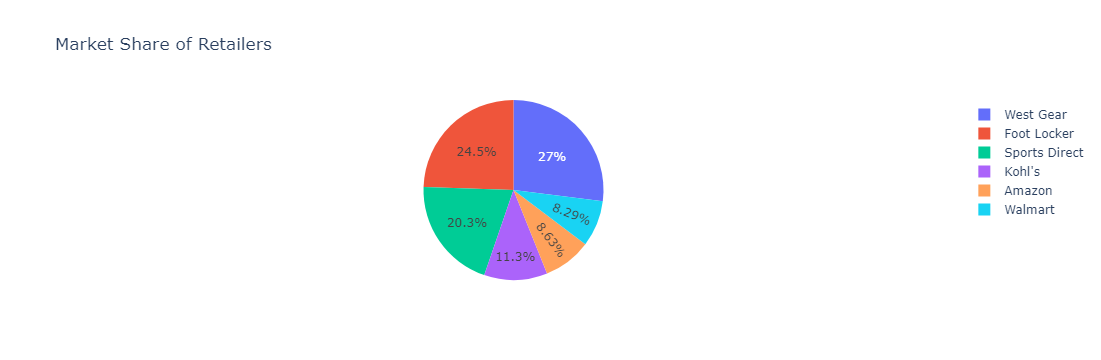

In [31]:

# Group the data by retailer and sum the total sales for each retailer
retailer_sales = data.groupby('Retailer')['Total Sales'].sum()

# Calculate the total sales of all retailers
total_sales = retailer_sales.sum()

# Calculate the market share of each retailer by dividing their total sales by the total sales of all retailers
market_share = retailer_sales / total_sales

# Create a pie chart using plotly
fig = px.pie(market_share, values=market_share, names=market_share.index, title='Market Share of Retailers')

# Show the plot
fig.show()

## Total Sales by Retailer

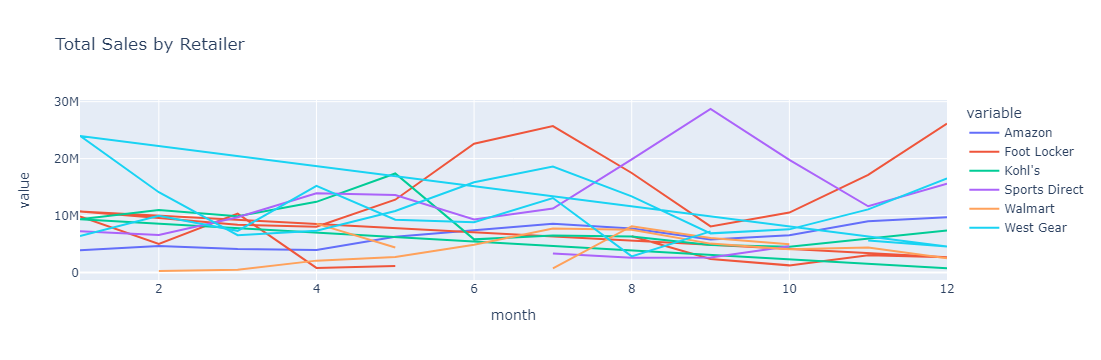

In [32]:
# Convert the Invoice Date column to datetime data type
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Extract the month and year from the Invoice Date
data['month'] = data['Invoice Date'].dt.month
data['year'] = data['Invoice Date'].dt.year

# Group the data by retailer, year, and month and sum the total sales for each group
retailer_sales = data.groupby(['Retailer', 'year', 'month'])['Total Sales'].sum()
retailer_sales_df = retailer_sales.unstack(level=0)
retailer_sales_df = retailer_sales_df.reset_index()
fig = px.line(retailer_sales_df, x='month', y=retailer_sales_df.columns[1:], title='Total Sales by Retailer')

# Show the plot
fig.show()

## Total Sales by Product and Retailer

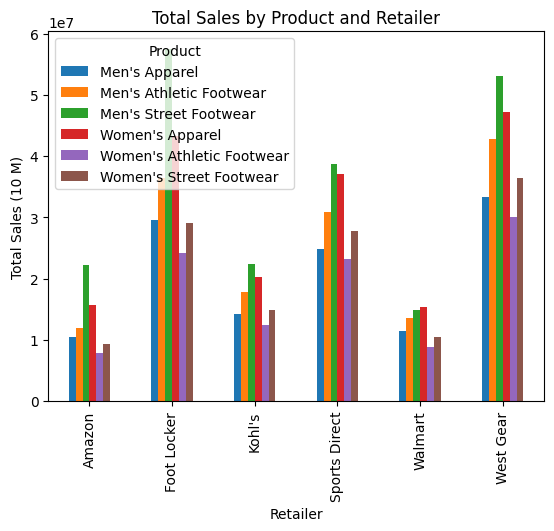

In [33]:
product_sales = data.groupby(['Retailer', 'Product'])['Total Sales'].sum()
product_sales_df = product_sales.unstack(level=1)
product_sales_df.plot(kind='bar', title='Total Sales by Product and Retailer')
plt.ylabel("Total Sales (10 M)")
plt.show()


In [34]:
top_pr=data[['Product','Total Sales']].groupby('Product').sum()
top_pr

3,Total Sales
Product,
Men's Apparel,123728632.0
Men's Athletic Footwear,153673680.0
Men's Street Footwear,208826244.0
Women's Apparel,179038860.0
Women's Athletic Footwear,106631896.0
Women's Street Footwear,128002813.0
